* 예제 핵심 : DICOM 표준 attribute에 커스텀 attribute를 추가하는 방법을 배운다. (커스텀 추가는 일반적으로는 추천하지 않으나 in-house 프로그램 또는 빠진 부분 존재시 사용 가능)
* < 'pydicom.\_dicom\_dict' 모듈> DicomDictionary : 표준 DICOM attribute가 기록되어 있음. 
* < 'pydicom.dataset.Dataset' 모듈> top() : sequence 타입 하위 항목 제외하고 출력 

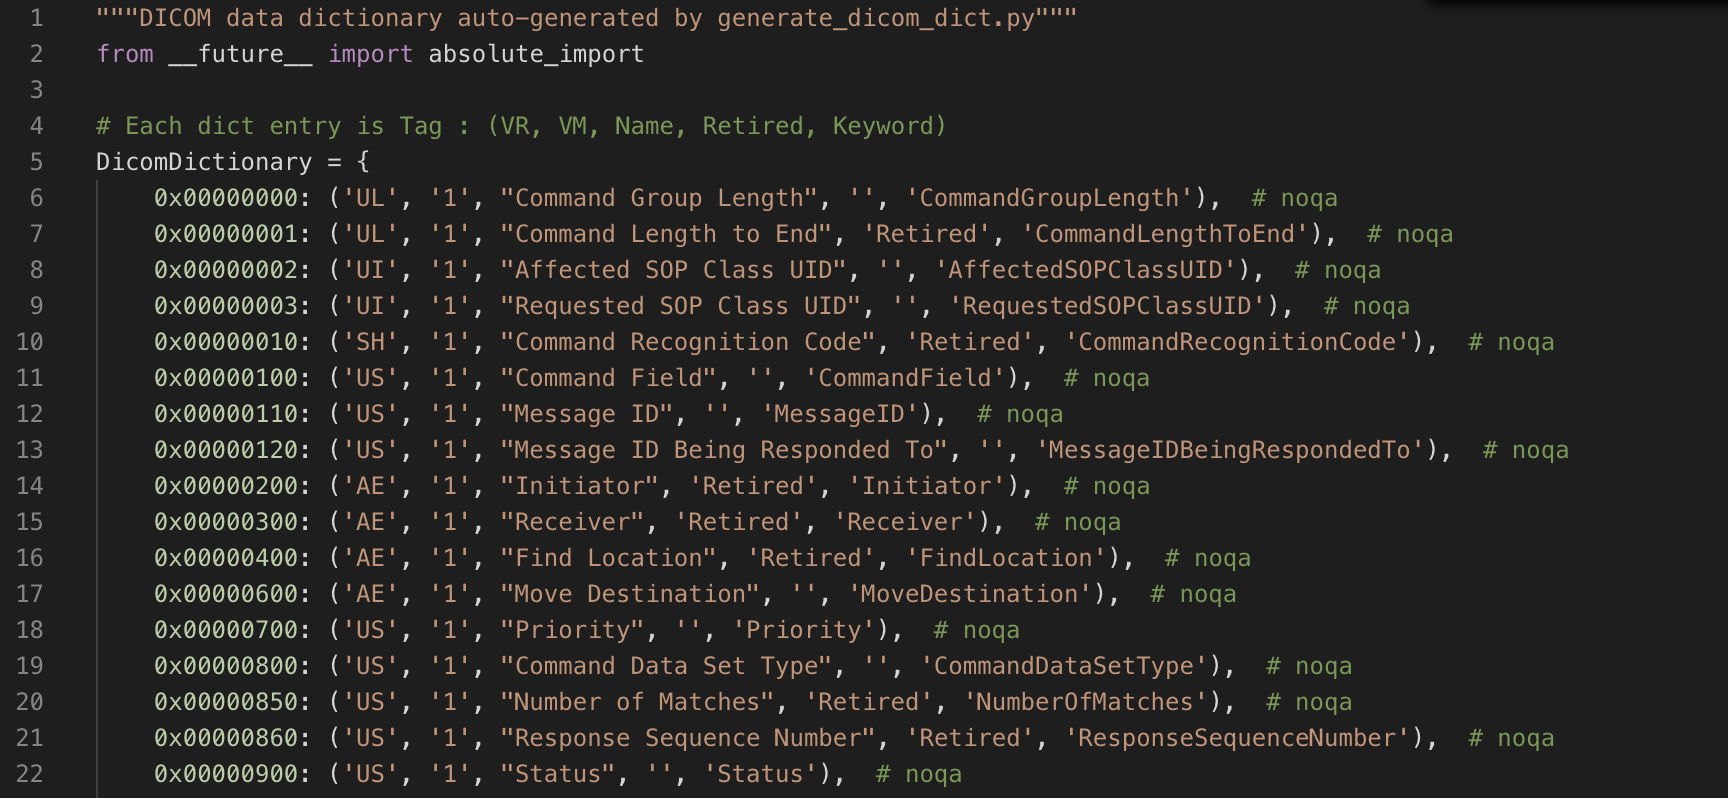

In [5]:
#################### WARNGIN #################### 
# Note that this is not a recommended solution in general 
# but it is useful as a demonstration or for in-house programs only, 
# or to get around elements missing from pydicom’s DICOM dictionaries.
################################################# 

# authors : Darcy Mason
#           Guillaume Lemaitre <g.lemaitre58@gmail.com>
# license : MIT

from __future__ import print_function

from pydicom.datadict import DicomDictionary, keyword_dict
from pydicom.dataset import Dataset

print(__doc__)

# Define items as (VR, VM, description, is_retired flag, keyword)
#   Leave is_retired flag blank.
new_dict_items = {
    0x10011001: ('UL', '1', "Test One", '', 'TestOne'),
    0x10011002: ('OB', '1', "Test Two", '', 'TestTwo'),
    0x10011003: ('UI', '1', "Test Three", '', 'TestThree'),
}

# Update the dictionary itself
DicomDictionary.update(new_dict_items)

# Update the reverse mapping from name to tag
new_names_dict = dict([(val[4], tag) for tag, val in
                       new_dict_items.items()])
keyword_dict.update(new_names_dict)

# Test that it is working
ds = Dataset()  # or could get one from dcmread, etc

ds.TestOne = 42
ds.TestTwo = '12345'
ds.TestThree = '1.2.3.4.5'

print(ds.top())

Automatically created module for IPython interactive environment
(1001, 1001) Private tag data                    UL: 42
(1001, 1002) Private tag data                    OB: '12345'
(1001, 1003) Private tag data                    UI: 1.2.3.4.5
